<a href="https://colab.research.google.com/github/jwilliams2023/heart-failure-dataset/blob/main/Stats_4000_Intermediate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Dataset loading

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

## Exploratory Data Analysis

### Basic Info

In [8]:
print(df.info())print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

### Check for missing values

In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### Class Distribution of Target Variable

<ipython-input-10-adf5901de826>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["DEATH_EVENT"], palette="coolwarm")


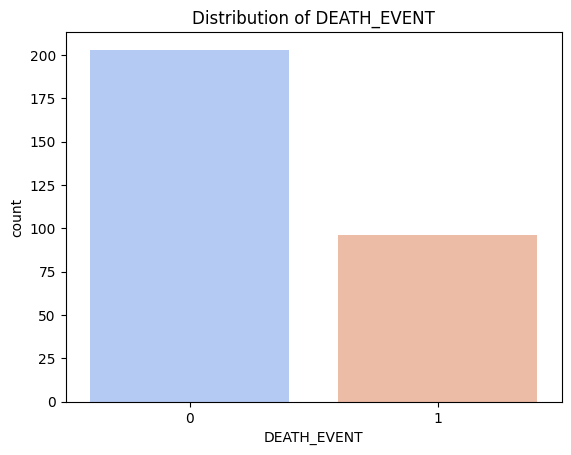

In [10]:
sns.countplot(x=df["DEATH_EVENT"], palette="coolwarm")
plt.title("Distribution of DEATH_EVENT")
plt.show()

### Histograms for feature distributions

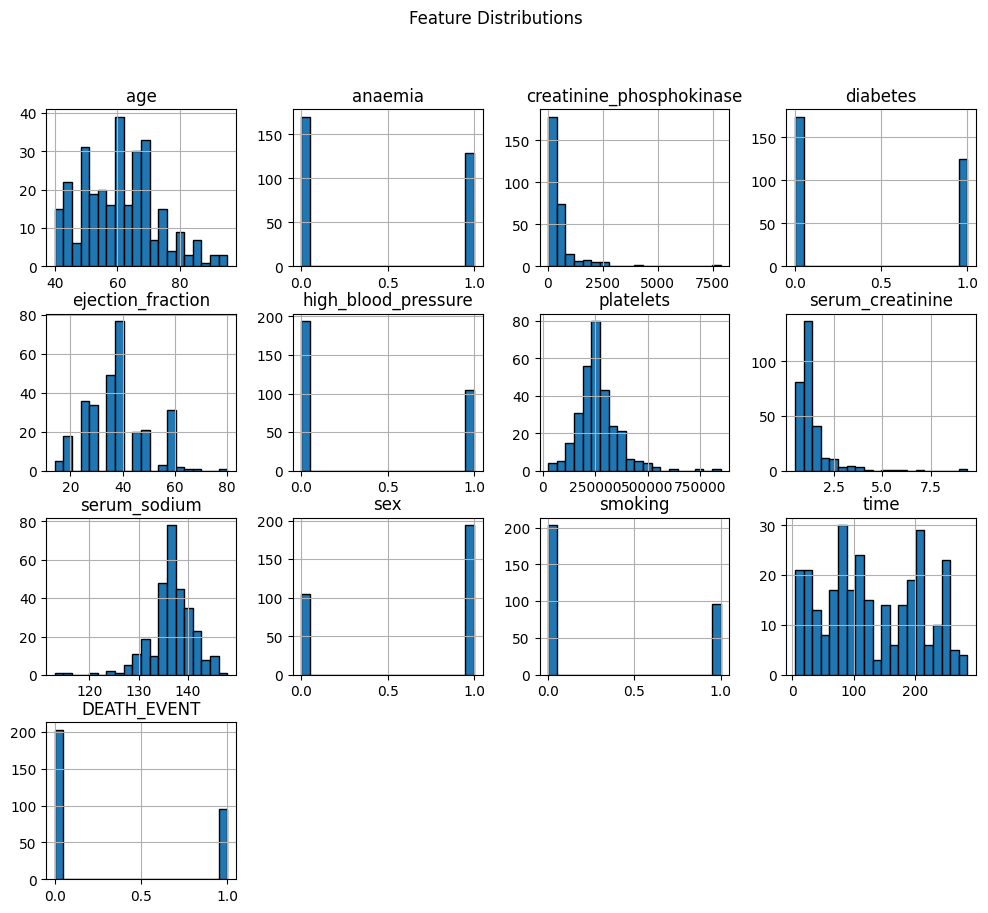

In [11]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

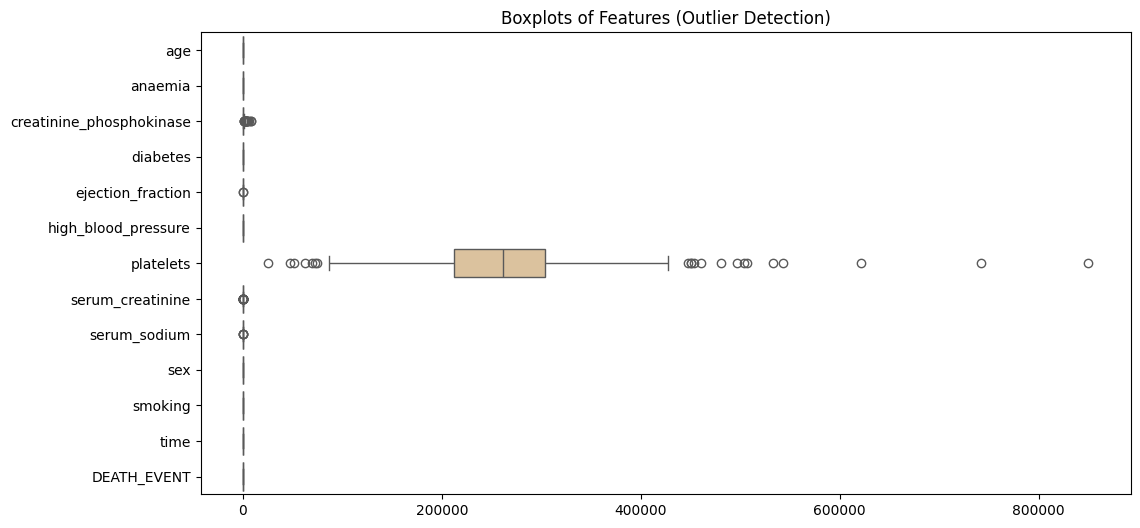

In [12]:
# 5. Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features (Outlier Detection)")
plt.show()

### Correlation Heatmap

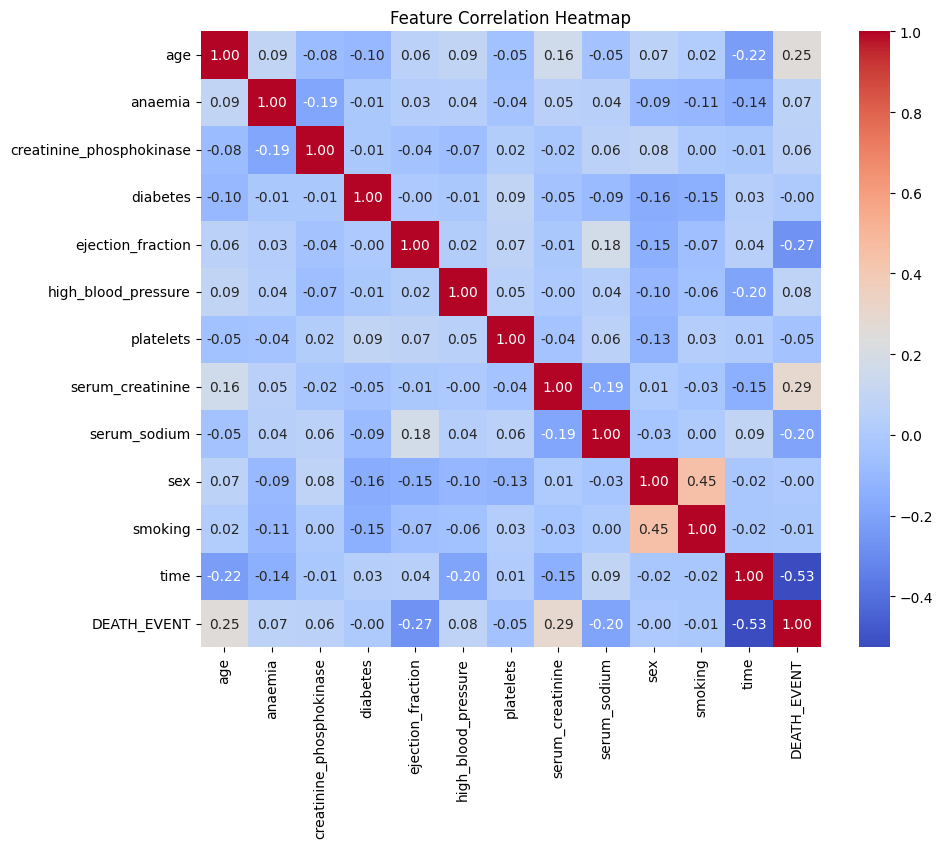

In [13]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Boxplots of Key Variables by Death

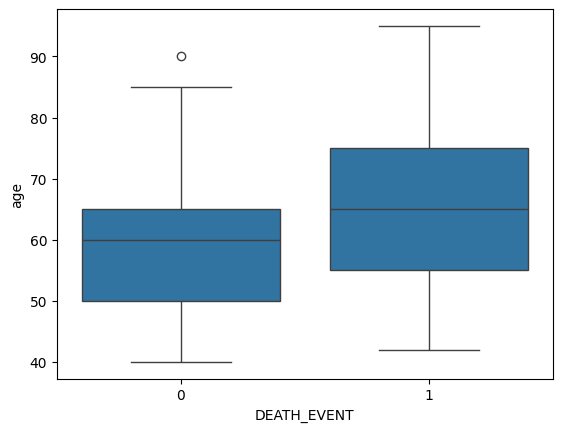

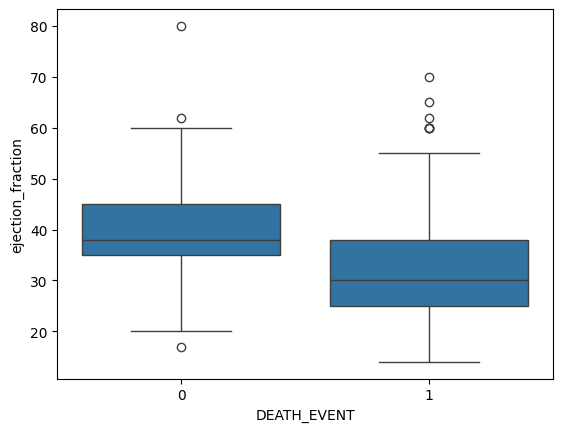

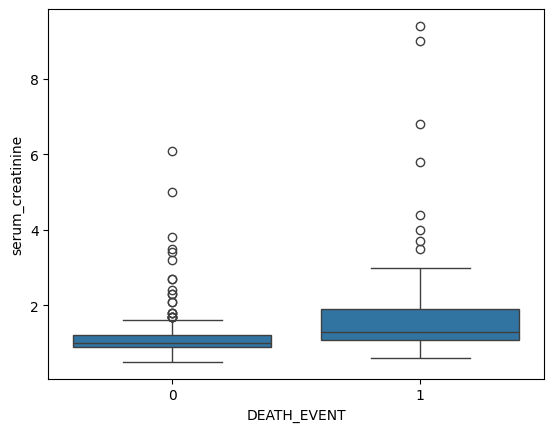

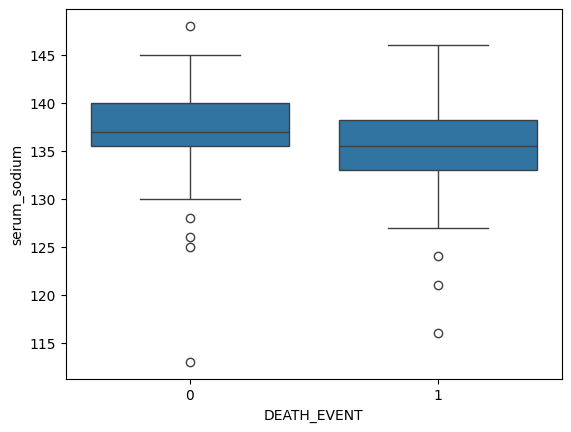

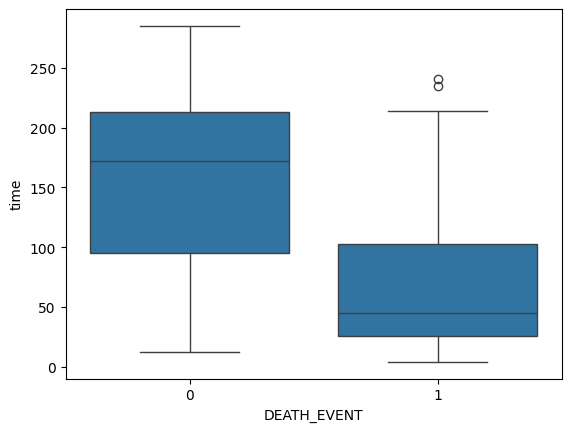

In [14]:
key_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
for var in key_vars:
    plt.figure()
    sns.boxplot(x='DEATH_EVENT', y=var, data=df)

## Classification modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<ipython-input-23-f9e3b6d6990e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette="coolwarm")


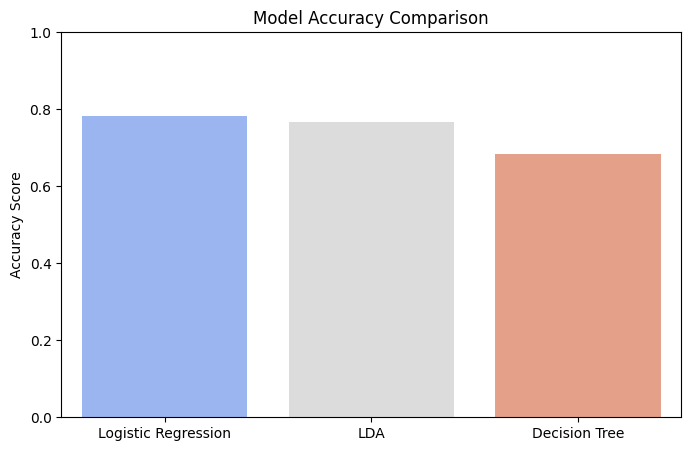

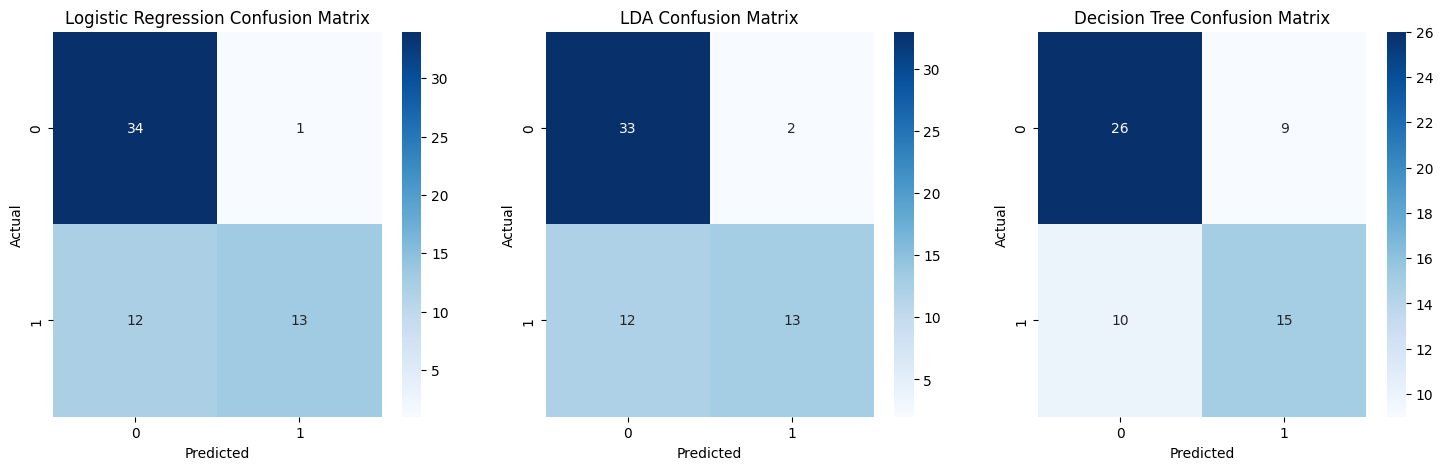

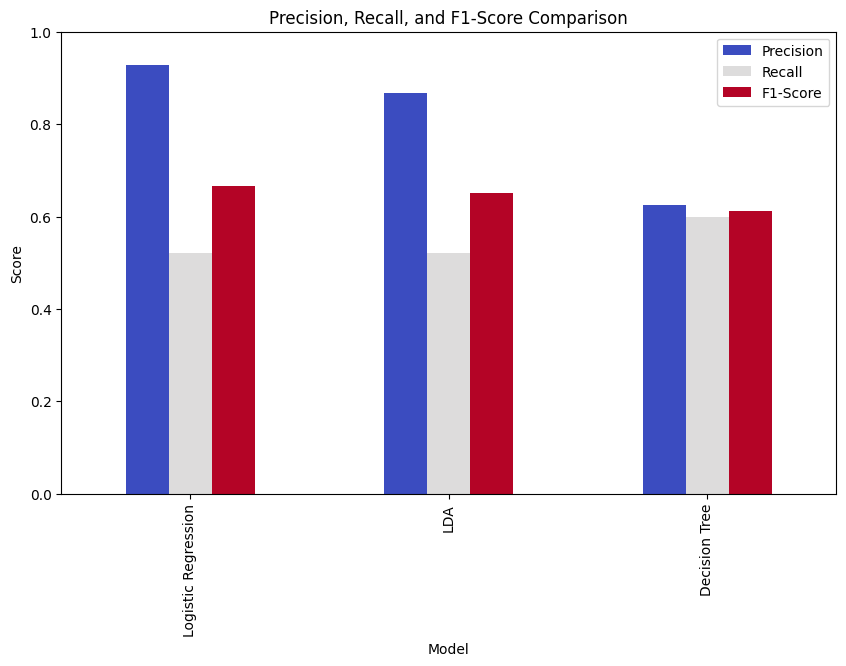

In [23]:

# Load data from UCI repository
dataset = fetch_ucirepo(id=519)
df = pd.DataFrame(dataset.data.features)
df["DEATH_EVENT"] = dataset.data.targets

# Classification Modeling
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation using LDA, Logistic Regression, Decision Trees
model_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "LDA": accuracy_score(y_test, y_pred_lda),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}

# Bar Chart of Accuracy Scores
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette="coolwarm")
plt.ylim(0,1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [("Logistic Regression", y_pred_log), ("LDA", y_pred_lda), ("Decision Tree", y_pred_dt)]
for ax, (name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.show()

# Precision, Recall, F1 score Visuals
metrics_df = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Precision": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_lda, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_lda, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_lda, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score']
    ]
})

metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Precision, Recall, and F1-Score Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()